In [4]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns
import squarify
import config
#to fix scientific notation for currency from https://stackoverflow.com/questions/38689125/how-to-get-rid-of-pandas-converting-large-numbers-in-excel-sheet-to-exponential
pd.options.display.float_format = '{:.2f}'.format
def col_pct_chg(col1,col2):
    return((col2 - col1)/col1)*100

In [5]:
MELI = pd.read_excel(config.MELI, sheet_name='Sales Data')#, dtype={'Date':str, Revenue})
MELI

,Quarter,Country,Currency,Category,Listing Type,Buying Mode,Condition,Accepts Mercadopago,Offers MercadoEnvios,Power Seller,Official Store,Units,USD GMV,USD Sales Fees
0,1Q15,Argentina,ARS,"Electronics, Audio and Video",Bronze,Auction,New,1,0,0,0,515.00,30210.30,3323.13
1,1Q15,Argentina,ARS,"Electronics, Audio and Video",Bronze,Auction,New,1,0,1,0,20.00,1149.89,126.49
2,1Q15,Argentina,ARS,"Electronics, Audio and Video",Bronze,Auction,Unspecifed,1,0,0,0,10.00,1526.66,167.93
3,1Q15,Argentina,ARS,"Electronics, Audio and Video",Bronze,Auction,Used,1,0,0,0,1060.00,69380.14,7631.82
4,1Q15,Argentina,ARS,"Electronics, Audio and Video",Bronze,Buy It Now,New,1,0,0,0,14570.00,1427240.72,156996.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17590,4Q14,Venezuela,VEF,Appliances,Silver,Buy It Now,New,1,0,1,0,8470.00,1370351.75,82296.25
17591,4Q14,Venezuela,VEF,Appliances,Silver,Buy It Now,Unspecifed,1,0,0,0,60.00,30456.00,1827.36
17592,4Q14,Venezuela,VEF,Appliances,Silver,Buy It Now,Unspecifed,1,0,1,0,10.00,1450.00,87.00
17593,4Q14,Venezuela,VEF,Appliances,Silver,Buy It Now,Used,1,0,0,0,2285.00,451443.54,27086.61


#### Adding take rates to data, detailed in data risks.

In [432]:
MELI['Take Rate (%)'] = (MELI['USD Sales Fees']/MELI['USD GMV'])*100
MELI['Brazil TR'] = MELI.apply(brazil_takerate, axis=1)
MELI['Brazil TR2'] = MELI.apply(brazil_takerate2, axis=1)
MELI

,Quarter,Country,Currency,Category,Listing Type,Buying Mode,Condition,Accepts Mercadopago,Offers MercadoEnvios,Power Seller,Official Store,Units,USD GMV,USD Sales Fees,Take Rate (%),Brazil TR,Brazil TR2
0,1Q15,Argentina,ARS,"Electronics, Audio and Video",Bronze,Auction,New,1,0,0,0,515.00,30210.30,3323.13,11.00,11.00,11.00
1,1Q15,Argentina,ARS,"Electronics, Audio and Video",Bronze,Auction,New,1,0,1,0,20.00,1149.89,126.49,11.00,11.00,11.00
2,1Q15,Argentina,ARS,"Electronics, Audio and Video",Bronze,Auction,Unspecifed,1,0,0,0,10.00,1526.66,167.93,11.00,11.00,11.00
3,1Q15,Argentina,ARS,"Electronics, Audio and Video",Bronze,Auction,Used,1,0,0,0,1060.00,69380.14,7631.82,11.00,11.00,11.00
4,1Q15,Argentina,ARS,"Electronics, Audio and Video",Bronze,Buy It Now,New,1,0,0,0,14570.00,1427240.72,156996.48,11.00,11.00,11.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17590,4Q14,Venezuela,VEF,Appliances,Silver,Buy It Now,New,1,0,1,0,8470.00,1370351.75,82296.25,6.01,7.50,8.50
17591,4Q14,Venezuela,VEF,Appliances,Silver,Buy It Now,Unspecifed,1,0,0,0,60.00,30456.00,1827.36,6.00,7.50,8.50
17592,4Q14,Venezuela,VEF,Appliances,Silver,Buy It Now,Unspecifed,1,0,1,0,10.00,1450.00,87.00,6.00,7.50,8.50
17593,4Q14,Venezuela,VEF,Appliances,Silver,Buy It Now,Used,1,0,0,0,2285.00,451443.54,27086.61,6.00,7.50,8.50


# Visualizations 

C:\Users\adamd\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


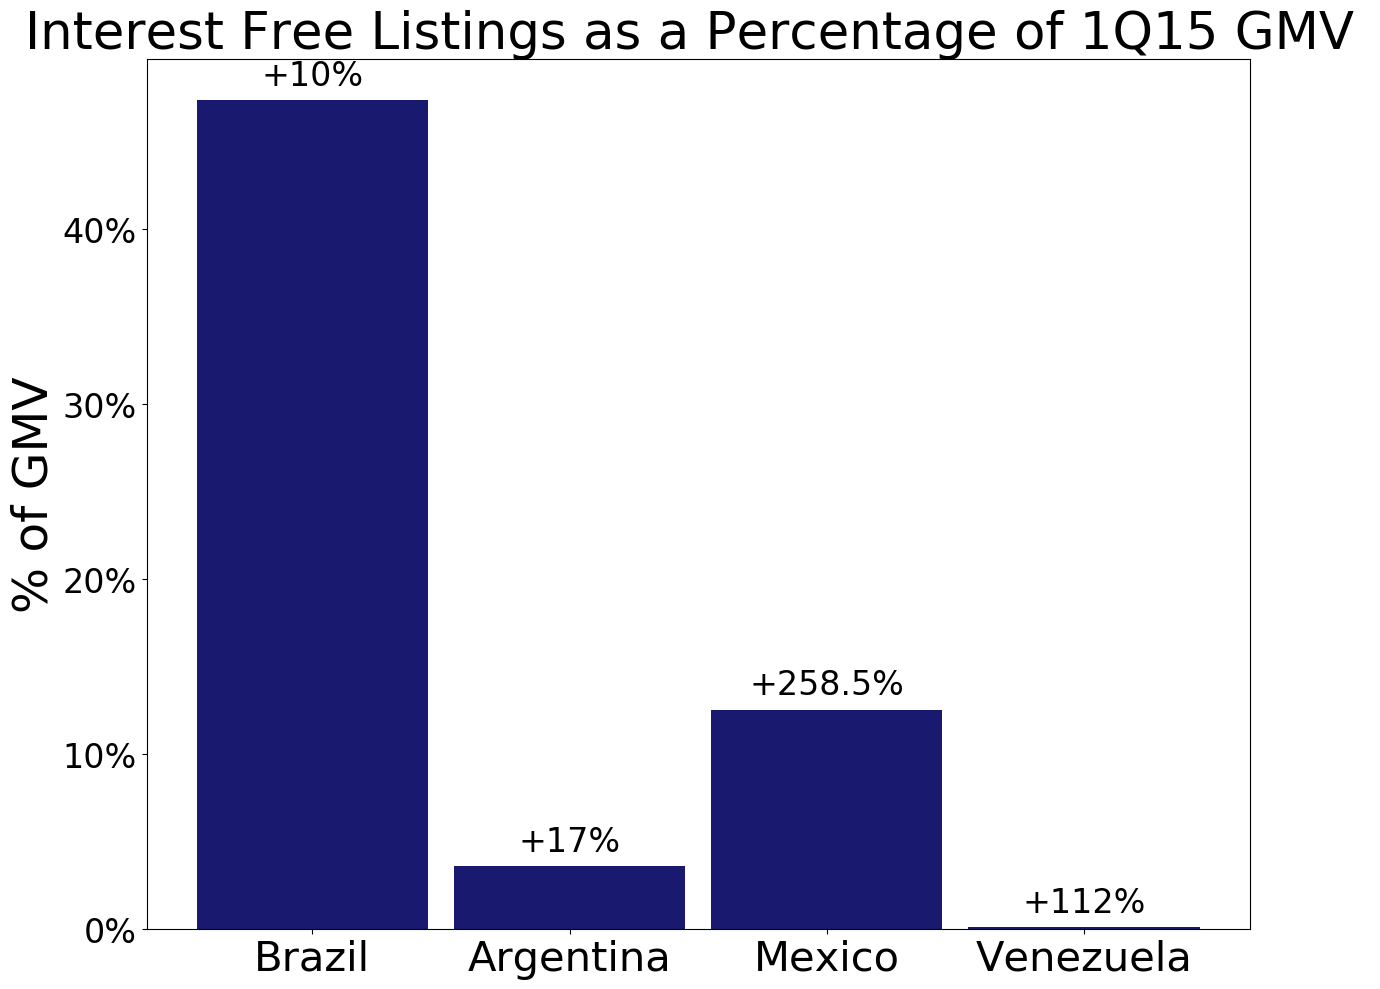

In [446]:
mpl.rcParams.update(mpl.rcParamsDefault)
DIF_GMV = pd.DataFrame([['Brazil', 47.34 ], ['Argentina', 3.59], ['Mexico', 12.52], ['Venezuela', .11]],
                       columns = ['Country', '1Q15 % of GMV'])


x = np.arange(len(DIF_GMV['Country']))  # the label locations
width = .9  # the width of the bars

fig, ax = plt.subplots(figsize=(14,10))
#ax2=ax.twinx()
rects1 = ax.bar(x, DIF_GMV['1Q15 % of GMV'], width, label='1Q15 % of GMV', color='midnightblue')
#rects2 = ax.bar(x - width, cb_bar['USD GMV 1Q15'], width, align='edge', label='USD GMV 1Q15', color='goldenrod')
#rects3 = ax2.bar(x, cb_bar['Units 4Q14'], width, align='edge', label='Units 4Q14', color='mediumblue')
#rects4 = ax2.bar(x + width, cb_bar['Units 1Q15'], width, align='edge', label='Units 1Q15', color='midnightblue')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of GMV', fontsize=35)
#ax2.set_ylabel('Units', fontsize=20, rotation=270, labelpad=10)
ax.set_title('Interest Free Listings as a Percentage of 1Q15 GMV ', fontsize=37)
ax.set_xticks(x)
ax.set_xticklabels(DIF_GMV['Country'], fontsize=30)
#.xticks(rotation=40, ha='right')

labels = ['+10%', '+17%', '+258.5%','+112%']

for rect, label in zip(rects1, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + .5, label, ha="center", va="bottom", fontsize=24)

fmt = '{x:,.0f}%'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.tick_params(axis='y', labelsize=24)

fig.tight_layout()
fig.show()

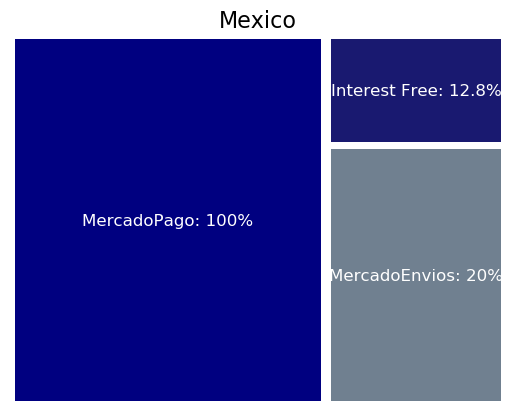

In [416]:

#Mexico
#offers pago, offers envios % of GMV, interest free% of GMV,
sizes=[100,40,17]
label=['MercadoPago: 100%', 'MercadoEnvios: 20%', 'Interest Free: 12.8%']
colors=['Navy','slategray','midnightblue']
squarify.plot(sizes, label=label, color=colors, pad=True, text_kwargs={'color':'white', 'size':12})
plt.axis('off')
plt.title('Mexico',fontsize=16)
plt.show()

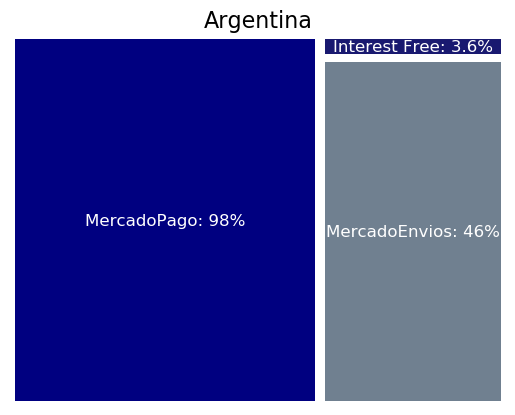

In [437]:
sizes=[98,55,3.6]
label=['MercadoPago: 98%', 'MercadoEnvios: 46%', 'Interest Free: 3.6%']
colors=['Navy','slategray','midnightblue']
squarify.plot(sizes, label=label, color=colors, pad=True, text_kwargs={'color':'white', 'size':12})
plt.axis('off')
plt.title('Argentina',fontsize=16)
plt.show()

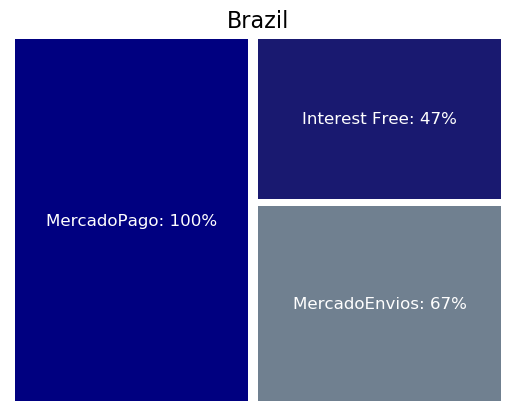

In [447]:
sizes=[100,57,47]
label=['MercadoPago: 100%', 'MercadoEnvios: 67%', 'Interest Free: 47%']
colors=['Navy','slategray','midnightblue']
squarify.plot(sizes, label=label, color=colors, pad=True, text_kwargs={'color':'white', 'size':12})
plt.axis('off')
plt.title('Brazil', fontsize=16)
plt.show()

C:\Users\adamd\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


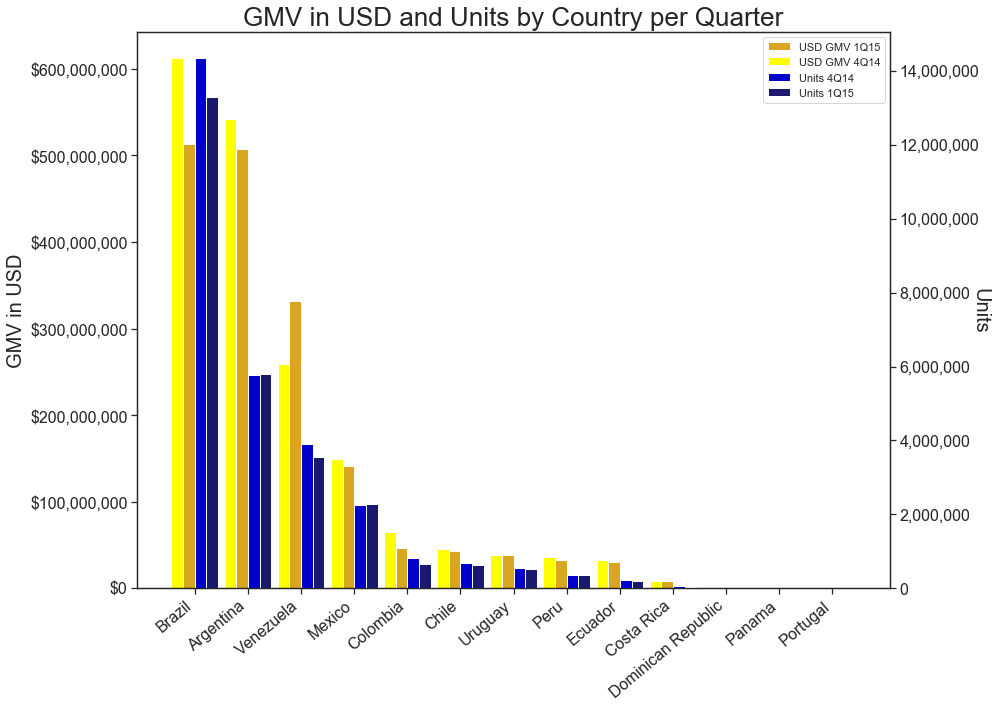

In [266]:
cb_bar = country_breakdown.copy()
#cb_bar.drop(['GMV % change', 'Units % change', 'GMV % of total', 'Units % of total'], axis=1, inplace=True)
cb_bar = cb_bar.reset_index()

x = np.arange(len(cb_bar['Country']))  # the label locations
width = 0.22  # the width of the bars

fig, ax = plt.subplots(figsize=(14,10))
ax2=ax.twinx()
rects1 = ax.bar(x - 2*width, cb_bar['USD GMV 4Q14'], width, align='edge', label='USD GMV 4Q14', color='yellow')
rects2 = ax.bar(x - width, cb_bar['USD GMV 1Q15'], width, align='edge', label='USD GMV 1Q15', color='goldenrod')
rects3 = ax2.bar(x, cb_bar['Units 4Q14'], width, align='edge', label='Units 4Q14', color='mediumblue')
rects4 = ax2.bar(x + width, cb_bar['Units 1Q15'], width, align='edge', label='Units 1Q15', color='midnightblue')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('GMV in USD', fontsize=20)
ax2.set_ylabel('Units', fontsize=20, rotation=270, labelpad=10)
ax.set_title('GMV in USD and Units by Country per Quarter', fontsize=26)
ax.set_xticks(x)
ax.set_xticklabels(cb_bar['Country'],rotation=40, ha='right', fontsize=16)
#.xticks(rotation=40, ha='right')

fmt = '${x:,.0f}'
fmt2 = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
tick2 =  mtick.StrMethodFormatter(fmt2)
ax.yaxis.set_major_formatter(tick)
ax2.yaxis.set_major_formatter(tick2)
ax.tick_params(axis='y', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)

#Legend for both axes
handles,labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]
#adding right axis (ax2) to legend
handles2,labels2 = ax2.get_legend_handles_labels()
ax.legend(handles+handles2, labels+labels2)

fig.tight_layout()

fig.show()

# Organization/Manipulation:

#### Segmenting the data into quarters and countries by quarter and storing them into a dictionary for easy access.

In [7]:
MELI_dict = {}
MELI_dict['4Q14'] = MELI.loc[MELI['Quarter']=='4Q14'].copy()
MELI_dict['1Q15'] = MELI.loc[MELI['Quarter']=='1Q15'].copy()
for quarter in MELI_dict.copy():
    for country in MELI['Country'].unique():
        #QUARTER ENTRIES ARE DATAFRAMES!!! YOU NEED TO MAKE NEW ENTRIES FOR EACH COUNTRY/QUARTER
        #EXAMPLE: MELI_dict[ARGENTINA_1Q15] = df.loc[........]
        key_name = str(country) + '_' + str(quarter)
        MELI_dict[key_name] = MELI_dict[quarter].loc[MELI_dict[quarter]['Country']== country] 
        
MELI_dict['Mexico_4Q14']

,Quarter,Country,Currency,Category,Listing Type,Buying Mode,Condition,Accepts Mercadopago,Offers MercadoEnvios,Power Seller,Official Store,Units,USD GMV,USD Sales Fees
14119,4Q14,Mexico,MXN,"Electronics, Audio and Video",Bronze,Auction,New,1,0,0,0,155.00,4720.33,518.99
14120,4Q14,Mexico,MXN,"Electronics, Audio and Video",Bronze,Auction,New,1,0,1,0,440.00,2066.21,386.28
14121,4Q14,Mexico,MXN,"Electronics, Audio and Video",Bronze,Auction,Unspecifed,1,0,0,0,5.00,295.95,29.59
14122,4Q14,Mexico,MXN,"Electronics, Audio and Video",Bronze,Auction,Used,1,0,0,0,230.00,9589.00,968.79
14123,4Q14,Mexico,MXN,"Electronics, Audio and Video",Bronze,Buy It Now,New,1,0,0,0,21620.00,1475553.03,149219.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,4Q14,Mexico,USD,Other Categories,Silver,Buy It Now,New,1,0,0,0,5.00,65.00,27.50
15331,4Q14,Mexico,USD,Other Categories,Silver,Buy It Now,Used,1,0,0,0,5.00,1995.00,129.67
15332,4Q14,Mexico,USD,"Books, Magazines, and Comics",Bronze,Buy It Now,New,1,0,0,0,5.00,175.00,42.00
15333,4Q14,Mexico,USD,"Books, Magazines, and Comics",Bronze,Buy It Now,Used,1,0,0,0,25.00,470.00,210.00


# Questions

### 1. How fast are MELI’s marketplace units sold and GMV growing (in USD), both overall and at the country-level?

In [160]:
country_GMV14 = pd.DataFrame(MELI_dict['4Q14'].groupby('Country')['USD GMV'].sum())
country_GMV15 = pd.DataFrame(MELI_dict['1Q15'].groupby('Country')['USD GMV'].sum())
country_breakdown = country_GMV14.merge(country_GMV15, left_index=True, right_on='Country')
country_breakdown.rename({'USD GMV_x':'USD GMV 4Q14', 'USD GMV_y':'USD GMV 1Q15'}, axis=1, inplace=True)

country_units14 = pd.DataFrame(MELI_dict['4Q14'].groupby('Country')['Units'].sum())
country_units15 = pd.DataFrame(MELI_dict['1Q15'].groupby('Country')['Units'].sum())
country_breakdown = country_breakdown.merge(country_units14, left_index=True, right_on='Country')
country_breakdown = country_breakdown.merge(country_units15, left_index=True, right_on='Country')
country_breakdown.rename({'Units_x':'Units 4Q14', 'Units_y':'Units 1Q15'}, axis=1, inplace=True)

country_breakdown.loc['Total'] = pd.Series({'USD GMV 4Q14':MELI_dict['4Q14']['USD GMV'].sum(), 
                                           'USD GMV 1Q15':MELI_dict['1Q15']['USD GMV'].sum(),
                                           'Units 4Q14':MELI_dict['4Q14']['Units'].sum(),
                                           'Units 1Q15':MELI_dict['1Q15']['Units'].sum()})
country_breakdown['GMV % change'] = col_pct_chg(country_breakdown['USD GMV 4Q14'],
                                                country_breakdown['USD GMV 1Q15'])
country_breakdown['Units % change'] = col_pct_chg(country_breakdown['Units 4Q14'],
                                                country_breakdown['Units 1Q15'])
#based on 4Q14 GMV
country_breakdown['GMV % of total'] = country_breakdown['USD GMV 4Q14']/MELI_dict['4Q14']['USD GMV'].sum()*100
country_breakdown['Units % of total'] = country_breakdown['Units 4Q14']/MELI_dict['4Q14']['Units'].sum()*100
country_breakdown = country_breakdown.sort_values('GMV % of total', ascending=False)
country_breakdown

,USD GMV 4Q14,USD GMV 1Q15,Units 4Q14,Units 1Q15,GMV % change,Units % change,GMV % of total,Units % of total
Country,,,,,,,,
Total,1793463139.22,1698750605.61,28975860.00,27381805.00,-5.28,-5.50,100.00,100.00
Brazil,612010621.16,512510325.03,14334500.00,13286245.00,-16.26,-7.31,34.12,49.47
Argentina,541676826.70,507779841.05,5760620.00,5796365.00,-6.26,0.62,30.20,19.88
Venezuela,259397920.95,332366901.15,3903495.00,3558445.00,28.13,-8.84,14.46,13.47
Mexico,149508772.93,141728563.33,2253770.00,2271300.00,-5.20,0.78,8.34,7.78
Colombia,65309416.47,46783951.23,814955.00,651370.00,-28.37,-20.07,3.64,2.81
Chile,45481791.54,43222923.87,693495.00,641325.00,-4.97,-7.52,2.54,2.39
Uruguay,39125414.88,39054586.75,540360.00,525685.00,-0.18,-2.72,2.18,1.86
Peru,36267305.58,32516870.00,370635.00,361585.00,-10.34,-2.44,2.02,1.28


#### Comparing 4Q14 data derived figures to actual reported figures, and 1Q15 estimates to consensus

In [7]:
### 4Q14 data vs actual figure variance
GMV_4Q14A = 1797300000
dataset_GMV_4Q14 = MELI_dict['4Q14']['USD GMV'].sum()
GMV_4Q14_variance = ((GMV_4Q14A/dataset_GMV_4Q14)-1)*100
print('Variance in GMV 4Q14 Actual vs dataset: ', GMV_4Q14_variance, '%')
units_4Q14A = 29000000
dataset_units_4Q14 = MELI_dict['4Q14']['Units'].sum()
units_4Q14_variance = ((units_4Q14A/dataset_units_4Q14)-1)*100
print('Variance in Units 4Q14 Actual vs dataset: ', units_4Q14_variance, '%')
print()
### Consensus calculations
#Deutsche Bank
db_GMVE_1Q15 = 1669000000
#Piper Jaffray
pj_GMVE_1Q15 = 1887000000
#Credit Suisse
cs_GMVE_1Q15 = 1659000000
consensus_GMV_1Q15 = (db_GMVE_1Q15 + pj_GMVE_1Q15 + cs_GMVE_1Q15)/3
dataset_GMV_1Q15 = MELI_dict['1Q15']['USD GMV'].sum()
Q115_GMV_vs_street = ((dataset_GMV_1Q15/consensus_GMV_1Q15)-1)*100
print('Dataset 1Q15E GMV vs Consensus: ', Q115_GMV_vs_street, '%')
print()
### YoY calculations
#1Q GMV YoY
GMV_1Q14A = 1797000000
GMV_YoY = col_pct_chg(GMV_1Q14A, dataset_GMV_1Q15)
print('1Q15 GMV YoY: ', GMV_YoY, '%')
#1Q14 Units YoY
units_1Q14A = 22000000
dataset_units_1Q15 = MELI_dict['1Q15']['Units'].sum()
units_1QYoY = col_pct_chg(units_1Q14A, dataset_units_1Q15)
print('1Q15 Units Sold YoY: ', units_1QYoY, '%')
#4Q14 GMV YoY
GMV_4Q13A = 2139000000
units_4QYoY = col_pct_chg(GMV_4Q13A, GMV_4Q14A)
print('4Q14 GMV Yoy: ', units_4QYoY, '%')
#4Q14 units YoY
units_4Q13A = 23000000
units_4QYoY = col_pct_chg(units_4Q13A, units_4Q14A)

print('4Q14 Units Sold YoY: ', units_4QYoY, '%')

Variance in GMV 4Q14 Actual vs dataset:  0.21393585915812086 %
Variance in Units 4Q14 Actual vs dataset:  0.08331072830969344 %

Dataset 1Q15E GMV vs Consensus:  -2.2770504924759405 %

1Q15 GMV YoY:  -5.467412041970326 %
1Q15 Units Sold YoY:  24.46275 %
4Q14 GMV Yoy:  -15.974754558204769 %
4Q14 Units Sold YoY:  26.08695652173913 %


### 2. How is penetration of interest free listings trending across Geographies...

#### as a % of listings

In [6]:
Lcount_Ltype_4Q14 = pd.DataFrame(MELI_dict['4Q14'].groupby(['Country', 'Listing Type'])['Quarter'].count())
Lcount_Ltype_1Q15 = pd.DataFrame(MELI_dict['1Q15'].groupby(['Country', 'Listing Type'])['Quarter'].count())

Lcount_Ltype = Lcount_Ltype_4Q14.merge(Lcount_Ltype_1Q15, left_index=True, right_on=['Country', 'Listing Type'])
Lcount_Ltype.rename({'Quarter_x':'Listing Count 4Q14', 'Quarter_y':'Listing Count 1Q15'}, axis=1, inplace=True)

Lcount_Ltype['Listing Count QoQ %chg'] = col_pct_chg(Lcount_Ltype['Listing Count 4Q14'], Lcount_Ltype['Listing Count 1Q15'])
#listing type as a percentage of the country
def country_listing_pctg14(row):
    return (row['Listing Count 4Q14']/MELI_dict[row.name[0]+'_4Q14']['Quarter'].count())*100
def country_listing_pctg15(row):
    return (row['Listing Count 1Q15']/MELI_dict[row.name[0]+'_1Q15']['Quarter'].count())*100
    
Lcount_Ltype['4Q14 % of Country Listings'] = Lcount_Ltype.apply(country_listing_pctg14, axis=1)
Lcount_Ltype['1Q15 % of Country Listings'] = Lcount_Ltype.apply(country_listing_pctg15, axis=1)

Lcount_Ltype
Lcount_Ltype.xs('Diamond Interest Free', level=1, drop_level=False)

NameError: name 'MELI_dict' is not defined

#### units sold

In [9]:
#fix this to count units, already halfway done
units_Ltype_4Q14 = pd.DataFrame(MELI_dict['4Q14'].groupby(['Country', 'Listing Type'])['Units'].sum())
units_Ltype_1Q15 = pd.DataFrame(MELI_dict['1Q15'].groupby(['Country', 'Listing Type'])['Units'].sum())

units_Ltype = units_Ltype_4Q14.merge(units_Ltype_1Q15, left_index=True, right_on=['Country', 'Listing Type'])
units_Ltype.rename({'Units_x':'Units Sold 4Q14', 'Units_y':'Units Sold 1Q15'}, axis=1, inplace=True)

units_Ltype['Units Sold QoQ %chg'] = col_pct_chg(units_Ltype['Units Sold 4Q14'],units_Ltype['Units Sold 1Q15'])
#units_Ltype['Units Sold QoQ chg'] = ((units_Ltype['Units Sold 1Q15']-units_Ltype['Units Sold 4Q14'])/units_Ltype['Units Sold 4Q14'])
#units sold as a percentage of the country
def country_units_pctg14(row):
    return (row['Units Sold 4Q14']/MELI_dict[row.name[0]+'_4Q14']['Units'].sum())*100
def country_units_pctg15(row):
    return (row['Units Sold 1Q15']/MELI_dict[row.name[0]+'_1Q15']['Units'].sum())*100
    
units_Ltype['4Q14 % of Country Units Sold'] = units_Ltype.apply(country_units_pctg14, axis=1)
units_Ltype['1Q15 % of Country Units Sold'] = units_Ltype.apply(country_units_pctg15, axis=1)

units_Ltype
units_Ltype.xs('Diamond Interest Free', level=1, drop_level=False)

,,Units Sold 4Q14,Units Sold 1Q15,Units Sold QoQ %chg,4Q14 % of Country Units Sold,1Q15 % of Country Units Sold
Country,Listing Type,,,,,
Argentina,Diamond Interest Free,129850.00,149950.00,15.48,2.25,2.59
Brazil,Diamond Interest Free,5506235.00,6837580.00,24.18,38.41,51.46
Chile,Diamond Interest Free,3490.00,5460.00,56.45,0.50,0.85
Colombia,Diamond Interest Free,4350.00,4655.00,7.01,0.53,0.71
Mexico,Diamond Interest Free,71480.00,283280.00,296.31,3.17,12.47
Uruguay,Diamond Interest Free,4190.00,23780.00,467.54,0.78,4.52
Venezuela,Diamond Interest Free,3675.00,8235.00,124.08,0.09,0.23


#### and % of GMV

In [10]:
GMV_Ltype_4Q14 = pd.DataFrame(MELI_dict['4Q14'].groupby(['Country', 'Listing Type'])['USD GMV'].sum())
GMV_Ltype_1Q15 = pd.DataFrame(MELI_dict['1Q15'].groupby(['Country', 'Listing Type'])['USD GMV'].sum())

GMV_Ltype = GMV_Ltype_4Q14.merge(GMV_Ltype_1Q15, left_index=True, right_on=['Country', 'Listing Type'])
GMV_Ltype.rename({'USD GMV_x':'4Q14 GMV', 'USD GMV_y':'1Q15 GMV'}, axis=1, inplace=True)

GMV_Ltype['GMV QoQ %chg'] = col_pct_chg(GMV_Ltype['4Q14 GMV'],GMV_Ltype['1Q15 GMV'])
#GMV_Ltype['GMV QoQ %chg'] = ((GMV_Ltype['1Q15 GMV']-GMV_Ltype['4Q14 GMV'])/GMV_Ltype['4Q14 GMV'])
#GMV_Ltype = GMV_Ltype[['4Q14 GMV', '4Q14 % of total GMV', '1Q15 GMV', '1Q15 % of total GMV', 'GMV QoQ %chg']]

def country_pctg14(row):
    return (row['4Q14 GMV']/MELI_dict[row.name[0]+'_4Q14']['USD GMV'].sum())*100
def country_pctg15(row):
    return (row['1Q15 GMV']/MELI_dict[row.name[0]+'_1Q15']['USD GMV'].sum())*100
    
GMV_Ltype['4Q14 % of Country GMV'] = GMV_Ltype.apply(country_pctg14, axis=1)
GMV_Ltype['1Q15 % of Country GMV'] = GMV_Ltype.apply(country_pctg15, axis=1)

GMV_Ltype.xs('Diamond Interest Free', level=1, drop_level=False)

,,4Q14 GMV,1Q15 GMV,GMV QoQ %chg,4Q14 % of Country GMV,1Q15 % of Country GMV
Country,Listing Type,,,,,
Argentina,Diamond Interest Free,15555229.61,18243921.55,17.28,2.87,3.59
Brazil,Diamond Interest Free,220608745.05,242644406.92,9.99,36.05,47.34
Chile,Diamond Interest Free,373691.81,458964.21,22.82,0.82,1.06
Colombia,Diamond Interest Free,596569.37,645815.16,8.25,0.91,1.38
Mexico,Diamond Interest Free,5068140.91,18170626.56,258.53,3.39,12.82
Uruguay,Diamond Interest Free,740566.81,2525334.43,241.00,1.89,6.47
Venezuela,Diamond Interest Free,178825.10,378975.13,111.93,0.07,0.11


### 3. How is MercadoPago adoption trending across Geographies....

#### as a % of listings

In [123]:
#fix this to count units, already halfway done
MP_Lcount_4Q14 = pd.DataFrame(MELI_dict['4Q14'].groupby(['Country', 'Accepts Mercadopago'])['Quarter'].count())
MP_Lcount_1Q15 = pd.DataFrame(MELI_dict['1Q15'].groupby(['Country', 'Accepts Mercadopago'])['Quarter'].count())

MP_Lcount = MP_Lcount_4Q14.merge(MP_Lcount_1Q15, left_index=True, right_on=['Country', 'Accepts Mercadopago'])
MP_Lcount.rename({'Quarter_x':'MP Listings 4Q14', 'Quarter_y':'MP Listings 1Q15'}, axis=1, inplace=True)

MP_Lcount['MP Listings QoQ % chg'] = col_pct_chg(MP_Lcount['MP Listings 4Q14'], MP_Lcount['MP Listings 1Q15'])
#MP_Lcount['MP Listings QoQ % chg'] = ((MP_Lcount['MP Listings 1Q15']-MP_Lcount['MP Listings 4Q14'])/MP_Lcount['MP Listings 4Q14'])
#units sold as a percentage of the country
def MP_Lcount_pctg14(row):
    return row['MP Listings 4Q14']/MELI_dict[row.name[0]+'_4Q14']['Quarter'].count()*100
def MP_Lcount_pctg15(row):
    return row['MP Listings 1Q15']/MELI_dict[row.name[0]+'_1Q15']['Quarter'].count()*100
    
MP_Lcount['4Q14 MP % of Country Listings'] = MP_Lcount.apply(MP_Lcount_pctg14, axis=1)
MP_Lcount['1Q15 MP % of Country Listings'] = MP_Lcount.apply(MP_Lcount_pctg15, axis=1)

MP_Lcount
MP_Lcount.xs(1, level=1, drop_level=False)

,,MP Listings 4Q14,MP Listings 1Q15,MP Listings QoQ % chg,4Q14 MP % of Country Listings,1Q15 MP % of Country Listings
Country,Accepts Mercadopago,,,,,
Argentina,1,1242,1417,14.09,90.86,92.67
Brazil,1,1601,1580,-1.31,100.00,100.00
Chile,1,304,307,0.99,30.01,30.31
Colombia,1,433,542,25.17,80.19,84.16
Mexico,1,1115,1281,14.89,91.69,100.00
Venezuela,1,563,580,3.02,85.05,85.42


#### Offers MercadoEnvios listing count

In [125]:
### Envios - Listing count
#fix this to count units, already halfway done
ME_Lcount_4Q14 = pd.DataFrame(MELI_dict['4Q14'].groupby(['Country', 'Offers MercadoEnvios'])['Quarter'].count())
ME_Lcount_1Q15 = pd.DataFrame(MELI_dict['1Q15'].groupby(['Country', 'Offers MercadoEnvios'])['Quarter'].count())

ME_Lcount = ME_Lcount_4Q14.merge(ME_Lcount_1Q15, left_index=True, right_on=['Country', 'Offers MercadoEnvios'])
ME_Lcount.rename({'Quarter_x':'ME Listings 4Q14', 'Quarter_y':'ME Listings 1Q15'}, axis=1, inplace=True)

ME_Lcount['ME Listings QoQ % chg'] = col_pct_chg(ME_Lcount['ME Listings 4Q14'],ME_Lcount['ME Listings 1Q15'])
#MP_Lcount['ME Listings QoQ % chg'] = ((ME_Lcount['ME Listings 1Q15']-MP_Lcount['MP Listings 4Q14'])/MP_Lcount['MP Listings 4Q14'])
#units sold as a percentage of the country
def ME_Lcount_pctg14(row):
    return row['ME Listings 4Q14']/MELI_dict[row.name[0]+'_4Q14']['Quarter'].count()*100
def ME_Lcount_pctg15(row):
    return row['ME Listings 1Q15']/MELI_dict[row.name[0]+'_1Q15']['Quarter'].count()*100
    
ME_Lcount['4Q14 ME % of Country Listings'] = ME_Lcount.apply(ME_Lcount_pctg14, axis=1)
ME_Lcount['1Q15 ME % of Country Listings'] = ME_Lcount.apply(ME_Lcount_pctg15, axis=1)

ME_Lcount
ME_Lcount.xs(1, level=1, drop_level=False)

,,ME Listings 4Q14,ME Listings 1Q15,ME Listings QoQ % chg,4Q14 ME % of Country Listings,1Q15 ME % of Country Listings
Country,Offers MercadoEnvios,,,,,
Argentina,1,473,538,13.74,34.60,35.19
Brazil,1,645,666,3.26,40.29,42.15
Mexico,1,313,432,38.02,25.74,33.72


#### units sold

In [126]:
#fix this to count units, already halfway done
MP_units_4Q14 = pd.DataFrame(MELI_dict['4Q14'].groupby(['Country', 'Accepts Mercadopago'])['Units'].sum())
MP_units_1Q15 = pd.DataFrame(MELI_dict['1Q15'].groupby(['Country', 'Accepts Mercadopago'])['Units'].sum())

MP_units = MP_units_4Q14.merge(MP_units_1Q15, left_index=True, right_on=['Country', 'Accepts Mercadopago'])
MP_units.rename({'Units_x':'MP Units 4Q14', 'Units_y':'MP Units 1Q15'}, axis=1, inplace=True)

MP_units['MP Units QoQ % chg'] = ((MP_units['MP Units 1Q15']-MP_units['MP Units 4Q14'])/MP_units['MP Units 4Q14'])
#units sold as a percentage of the country
def MP_units_pctg14(row):
    return row['MP Units 4Q14']/MELI_dict[row.name[0]+'_4Q14']['Units'].sum()*100
def MP_units_pctg15(row):
    return row['MP Units 1Q15']/MELI_dict[row.name[0]+'_1Q15']['Units'].sum()*100
    
MP_units['4Q14 MP % of Country Units'] = MP_units.apply(MP_units_pctg14, axis=1)
MP_units['1Q15 MP % of Country Units'] = MP_units.apply(MP_units_pctg15, axis=1)

MP_units
MP_units.xs(1, level=1, drop_level=False)

,,MP Units 4Q14,MP Units 1Q15,MP Units QoQ % chg,4Q14 MP % of Country Units,1Q15 MP % of Country Units
Country,Accepts Mercadopago,,,,,
Argentina,1,5680330.00,5763605.00,0.01,98.61,99.43
Brazil,1,14334500.00,13286245.00,-0.07,100.00,100.00
Chile,1,43875.00,35550.00,-0.19,6.33,5.54
Colombia,1,746535.00,602825.00,-0.19,91.60,92.55
Mexico,1,2228250.00,2271300.00,0.02,98.87,100.00
Venezuela,1,3786920.00,3422765.00,-0.10,97.01,96.19


#### Offers MercadoEnvios units sold

In [127]:
### Envios - units sold
#fix this to count units, already halfway done
ME_units_4Q14 = pd.DataFrame(MELI_dict['4Q14'].groupby(['Country', 'Offers MercadoEnvios'])['Units'].sum())
ME_units_1Q15 = pd.DataFrame(MELI_dict['1Q15'].groupby(['Country', 'Offers MercadoEnvios'])['Units'].sum())

ME_units = ME_units_4Q14.merge(ME_units_1Q15, left_index=True, right_on=['Country', 'Offers MercadoEnvios'])
ME_units.rename({'Units_x':'ME Units 4Q14', 'Units_y':'ME Units 1Q15'}, axis=1, inplace=True)

ME_units['ME Units QoQ % chg'] = col_pct_chg(ME_units['ME Units 4Q14'], ME_units['ME Units 1Q15'])
#ME_units['ME Units QoQ % chg'] = ((ME_units['ME Units 1Q15']-ME_units['ME Units 4Q14'])/ME_units['ME Units 4Q14'])
#units sold as a percentage of the country
def ME_units_pctg14(row):
    return row['ME Units 4Q14']/MELI_dict[row.name[0]+'_4Q14']['Units'].sum()*100
def ME_units_pctg15(row):
    return row['ME Units 1Q15']/MELI_dict[row.name[0]+'_1Q15']['Units'].sum()*100
    
ME_units['4Q14 ME % of Country Units'] = ME_units.apply(ME_units_pctg14, axis=1)
ME_units['1Q15 ME % of Country Units'] = ME_units.apply(ME_units_pctg15, axis=1)

ME_units
ME_units.xs(1, level=1, drop_level=False)

,,ME Units 4Q14,ME Units 1Q15,ME Units QoQ % chg,4Q14 ME % of Country Units,1Q15 ME % of Country Units
Country,Offers MercadoEnvios,,,,,
Argentina,1,2612245.00,2790700.00,6.83,45.35,48.15
Brazil,1,8356540.00,8152550.00,-2.44,58.30,61.36
Mexico,1,156150.00,392650.00,151.46,6.93,17.29


#### and GMV

In [438]:
#fix this to count units, already halfway done
MP_GMV_4Q14 = pd.DataFrame(MELI_dict['4Q14'].groupby(['Country', 'Accepts Mercadopago'])['USD GMV'].sum())
MP_GMV_1Q15 = pd.DataFrame(MELI_dict['1Q15'].groupby(['Country', 'Accepts Mercadopago'])['USD GMV'].sum())

MP_GMV = MP_GMV_4Q14.merge(MP_GMV_1Q15, left_index=True, right_on=['Country', 'Accepts Mercadopago'])
MP_GMV.rename({'USD GMV_x':'MP GMV 4Q14', 'USD GMV_y':'MP GMV 1Q15'}, axis=1, inplace=True)

MP_GMV['MP GMV QoQ chg'] = col_pct_chg(MP_GMV['MP GMV 4Q14'], MP_GMV['MP GMV 1Q15'])
#MP_GMV['MP GMV QoQ chg'] = ((MP_GMV['MP GMV 1Q15']-MP_GMV['MP GMV 4Q14'])/MP_GMV['MP GMV 4Q14'])
#units sold as a percentage of the country
def MP_GMV_pctg14(row):
    return row['MP GMV 4Q14']/MELI_dict[row.name[0]+'_4Q14']['USD GMV'].sum()*100
def MP_GMV_pctg15(row):
    return row['MP GMV 1Q15']/MELI_dict[row.name[0]+'_1Q15']['USD GMV'].sum()*100
    
MP_GMV['4Q14 MP % of Country GMV'] = MP_GMV.apply(MP_GMV_pctg14, axis=1)
MP_GMV['1Q15 MP % of Country GMV'] = MP_GMV.apply(MP_GMV_pctg15, axis=1)

MP_GMV
MP_GMV.xs(1, level=1, drop_level=False)

,,MP GMV 4Q14,MP GMV 1Q15,MP GMV QoQ chg,4Q14 MP % of Country GMV,1Q15 MP % of Country GMV
Country,Accepts Mercadopago,,,,,
Argentina,1,522090012.23,500161333.43,-4.20,96.38,98.50
Brazil,1,612010621.16,512510325.03,-16.26,100.00,100.00
Chile,1,2695402.84,2101449.00,-22.04,5.93,4.86
Colombia,1,50267451.09,35715266.20,-28.95,76.97,76.34
Mexico,1,144062681.61,141728563.33,-1.62,96.36,100.00
Venezuela,1,233115087.91,294438200.32,26.31,89.87,88.59


#### Offers MercadoEnvios GMV

In [129]:
#fix this to count units, already halfway done
ME_GMV_4Q14 = pd.DataFrame(MELI_dict['4Q14'].groupby(['Country', 'Offers MercadoEnvios'])['USD GMV'].sum())
ME_GMV_1Q15 = pd.DataFrame(MELI_dict['1Q15'].groupby(['Country', 'Offers MercadoEnvios'])['USD GMV'].sum())

ME_GMV = ME_GMV_4Q14.merge(ME_GMV_1Q15, left_index=True, right_on=['Country', 'Offers MercadoEnvios'])
ME_GMV.rename({'USD GMV_x':'ME GMV 4Q14', 'USD GMV_y':'ME GMV 1Q15'}, axis=1, inplace=True)

ME_GMV['ME GMV QoQ % chg'] = col_pct_chg(ME_GMV['ME GMV 4Q14'], ME_GMV['ME GMV 1Q15'])
#ME_GMV['ME GMV QoQ chg'] = ((ME_GMV['ME GMV 1Q15']-ME_GMV['ME GMV 4Q14'])/ME_GMV['ME GMV 4Q14'])
#units sold as a percentage of the country
def ME_GMV_pctg14(row):
    return row['ME GMV 4Q14']/MELI_dict[row.name[0]+'_4Q14']['USD GMV'].sum()*100
def ME_GMV_pctg15(row):
    return row['ME GMV 1Q15']/MELI_dict[row.name[0]+'_1Q15']['USD GMV'].sum()*100
    
ME_GMV['4Q14 ME % of Country GMV'] = ME_GMV.apply(ME_GMV_pctg14, axis=1)
ME_GMV['1Q15 ME % of Country GMV'] = ME_GMV.apply(ME_GMV_pctg15, axis=1)

ME_GMV
ME_GMV.xs(1, level=1, drop_level=False)

,,ME GMV 4Q14,ME GMV 1Q15,ME GMV QoQ % chg,4Q14 ME % of Country GMV,1Q15 ME % of Country GMV
Country,Offers MercadoEnvios,,,,,
Argentina,1,240076768.93,236080904.90,-1.66,44.32,46.49
Brazil,1,390232259.89,343199163.29,-12.05,63.76,66.96
Mexico,1,17696966.55,27690838.34,56.47,11.84,19.54


#### Take rate calculations: sales fees/USD, Brazil take rates, vs reported consolidated take rate, variances

In [435]:
#consolidated 4Q14 take rate (from Credit Suisse report)
cons_tr_4Q14 = 9.2
#average 4Q14 take rate, assuming:  take rate = sales fees/GMV 
dataset_avg_tr_4Q14 = MELI_dict['4Q14']['Take Rate (%)'].mean()
#Brazil take rates applied to all listings
brazil_take_rate_calc = MELI_dict['4Q14']['Brazil TR'].mean()
brazil_take_rate_calc2 = MELI_dict['4Q14']['Brazil TR2'].mean()
print('dataset 4Q14 consolidated take rate', dataset_avg_tr_4Q14, '%')
print('dataset 4Q14 cons take rate using Brazil Numbers', brazil_take_rate_calc, '%')
print('dataset 4Q14 cons take rate including Brazil listing fee Numbers', brazil_take_rate_calc2, '%')
take_rate_4Q14_variance = ((cons_tr_4Q14/dataset_avg_tr_4Q14)-1)*100
brazil_take_rate_4Q14_variance = ((cons_tr_4Q14/brazil_take_rate_calc)-1)*100
brazil_take_rate_4Q14_variance2 = ((cons_tr_4Q14/brazil_take_rate_calc2)-1)*100
print('Variance in consolidated take rate 4Q14A vs dataset avg: ', take_rate_4Q14_variance, '%')
print('Variance in consolidated take rate 4Q14A vs brazil numbers: ', brazil_take_rate_4Q14_variance, '%')
print('Variance in consolidated take rate 4Q14A vs brazil numbers WITH LISTING FEES: ', brazil_take_rate_4Q14_variance2, '%')
dataset_avg_tr_1Q15 = MELI_dict['1Q15']['Take Rate (%)'].mean()
print('1Q15 dataset avg take rate: ', dataset_avg_tr_1Q15, '%')
print('take rate % change acording to dataset: ', col_pct_chg(dataset_avg_tr_4Q14, dataset_avg_tr_1Q15), '%')
print('1Q15 avg take rate +/- 1.75%: ', dataset_avg_tr_1Q15*.9825, ', ', dataset_avg_tr_1Q15*1.0175)

dataset 4Q14 consolidated take rate 9.045158039847648 %
dataset 4Q14 cons take rate using Brazil Numbers 8.139014492753622 %
dataset 4Q14 cons take rate including Brazil listing fee Numbers 9.389797101449275 %
Variance in consolidated take rate 4Q14A vs dataset avg:  1.7118767794902956 %
Variance in consolidated take rate 4Q14A vs brazil numbers:  13.035798230744033 %
Variance in consolidated take rate 4Q14A vs brazil numbers WITH LISTING FEES:  -2.021312062429781 %
1Q15 dataset avg take rate:  9.323493716778225 %
take rate % change acording to dataset:  3.0771787038368403 %
1Q15 avg take rate +/- 1.75%:  9.160332576734607 ,  9.486654856821845


#### Confirming missing units in Argentina data

In [449]:
print(MELI_dict['Argentina_4Q14']['Quarter'].count())
print(MELI_dict['Argentina_4Q14']['Units'].count())
print((MELI_dict['Argentina_4Q14']['Units'].count()/MELI_dict['Argentina_4Q14']['Quarter'].count()-1)*100, '%')

1367
1321
-3.3650329188002925 %


#### Exploratory Take Rates Statistics

In [28]:
#Mean take rates by country (and Sdev)
take_rate_means14 = pd.DataFrame(MELI_dict['4Q14'].groupby(['Country', 'Listing Type'])['Take Rate (%)'].mean())
take_rate_sdevs14 = pd.DataFrame(MELI_dict['4Q14'].groupby(['Country', 'Listing Type'])['Take Rate (%)'].std())
take_rate_stats14 = take_rate_means14.merge(take_rate_sdevs14, left_index=True, right_on=['Country','Listing Type'])
take_rate_stats14.rename({'Take Rate (%)_x' : 'Mean', 'Take Rate (%)_y' : 'Standard Dev'}, axis=1, inplace=True)
#take_rate_stats_14.loc['Mexico']
#take_rate_stats.dtypes()
take_rate_means15 = pd.DataFrame(MELI_dict['1Q15'].groupby(['Country', 'Listing Type'])['Take Rate (%)'].mean())
take_rate_sdevs15 = pd.DataFrame(MELI_dict['1Q15'].groupby(['Country', 'Listing Type'])['Take Rate (%)'].std())
take_rate_stats15 = take_rate_means15.merge(take_rate_sdevs15, left_index=True, right_on=['Country','Listing Type'])
take_rate_stats15.rename({'Take Rate (%)_x' : 'Mean', 'Take Rate (%)_y' : 'Standard Dev'}, axis=1, inplace=True)
print(take_rate_stats14.loc['Brazil'])
print()
print(take_rate_stats15.loc['Brazil'])

                       Mean  Standard Dev
Listing Type                             
Bronze                 9.84          0.67
Diamond                7.48          0.27
Diamond Interest Free 13.59          1.99
Free                   0.00          0.00
Gold                   7.48          0.28
Silver                 7.47          0.24

                       Mean  Standard Dev
Listing Type                             
Bronze                 9.95          0.24
Diamond                7.50          0.00
Diamond Interest Free 14.07          2.26
Free                   0.00          0.00
Gold                   7.50          0.01
Silver                 7.50          0.07


In [29]:
#Used this cell to make the one above^ has mean and std for all countries/quarters
#save this cell to use later and use means for now. Maybe print Sdev just to stay aware of it.
#consider for looping for all countries - maybe commbine quarters too.
country_takerate_stats = 'Brazil_4Q14'
print('Mean')
print(MELI_dict[country_takerate_stats].groupby('Listing Type')['Take Rate (%)'].mean())
print()
print('Median')
print(MELI_dict[country_takerate_stats].groupby('Listing Type')['Take Rate (%)'].median())
print()
print('Sdev')
print(MELI_dict[country_takerate_stats].groupby('Listing Type')['Take Rate (%)'].std())
print()
print('Max')
print(MELI_dict[country_takerate_stats].groupby('Listing Type')['Take Rate (%)'].max())
print()
print('Min')
print(MELI_dict[country_takerate_stats].groupby('Listing Type')['Take Rate (%)'].min())

Mean
Listing Type
Bronze                   9.84
Diamond                  7.48
Diamond Interest Free   13.59
Free                     0.00
Gold                     7.48
Silver                   7.47
Name: Take Rate (%), dtype: float64

Median
Listing Type
Bronze                  10.00
Diamond                  7.50
Diamond Interest Free   14.84
Free                     0.00
Gold                     7.50
Silver                   7.50
Name: Take Rate (%), dtype: float64

Sdev
Listing Type
Bronze                  0.67
Diamond                 0.27
Diamond Interest Free   1.99
Free                    0.00
Gold                    0.28
Silver                  0.24
Name: Take Rate (%), dtype: float64

Max
Listing Type
Bronze                  10.00
Diamond                  7.66
Diamond Interest Free   15.00
Free                     0.00
Gold                     8.17
Silver                   7.99
Name: Take Rate (%), dtype: float64

Min
Listing Type
Bronze                  4.07
Diamond            

### Creating functions to add Brazilian take rates to the data 

In [431]:
#Brazilian take rate data given with assignment. rates such as "silver2_tr" are to repeat the calculation
# with the listing fee included
free_tr = 0
bronze_tr = 11
silver_tr = 7.5
silver2_tr = 8.5
gold_tr = 7.5
gold2_tr = 10.5
diamond_tr = 7.5
diamond2_tr = 12.5
goldspc_tr = 10.5
diamondif_tr = 15
#apply only Brazilian sales fees to new column based on Listing type
def brazil_takerate(row):
    if row['Listing Type'] == 'Bronze':
        return bronze_tr
    elif row['Listing Type'] == 'Silver':
        return silver_tr
    elif row['Listing Type'] == 'Gold':
        return gold_tr
    elif row['Listing Type'] == 'Diamond':
        return diamond_tr
    elif row['Listing Type'] == 'Diamond Interest Free':
        return diamondif_tr
    else:
        return 0
#same as above but includes listing fees 
def brazil_takerate2(row):
    if row['Listing Type'] == 'Bronze':
        return bronze_tr
    elif row['Listing Type'] == 'Silver':
        return silver2_tr
    elif row['Listing Type'] == 'Gold':
        return gold2_tr
    elif row['Listing Type'] == 'Diamond':
        return diamond2_tr
    elif row['Listing Type'] == 'Diamond Interest Free':
        return diamondif_tr
    else:
        return 0

#### MercadoPago overall penetration

In [451]:
#MercadoPago penetration of total market.
MELI_dict['4Q14'].loc[MELI_dict['4Q14']['Accepts Mercadopago']==1]['USD GMV'].sum()/MELI_dict['4Q14']['USD GMV'].sum()

0.8721903576534829